In [384]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from frites.conn import conn_reshape_undirected
# Import plot functions from current repo
import sys
sys.path.append('../')
from plot.plot_marsatlas import plot_marsatlas
from plot.plot_fcd import plot_fcd_circular_xr
import matplotlib.gridspec as gridspec
import pandas as pd
from ggseg import ggplot_marsatlas
import math
import matplotlib.cm as cm

## Figure 2. Local spatio-temporal correlates of information gain

In [7]:
# Load GCMI data
Results_Dir = '/home/INT/brovelli.a/code/hosi_infogain/data/'
fname = Results_Dir + 'outcome_infogain_gcmi.nc'
data = xr.load_dataset(fname)

# Stats params
threshold = 0.05
title = 'Outcome Information Gain' + ' p<' + str(threshold)

# Prepare data for plotting
gcmi = data['mi']
gcmi_tval = data['tval']
pvalues = data['pv']
allroi = data.roi
nroi = len(allroi)
times = data.times

    Load MarsAtlas labels
    Consider p-values < 0.05
/home/INT/brovelli.a/code/hosi_infogain/notebooks/../plot/plot_marsatlas.py:135: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[:, ('L', 'Subcortical')] = np.nan
/home/INT/brovelli.a/code/hosi_infogain/notebooks/../plot/plot_marsatlas.py:136: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[:, ('R', 'Subcortical')] = np.nan
    Time selection between (-0.10, 1.00)


/tmp/ipykernel_70186/3939601686.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


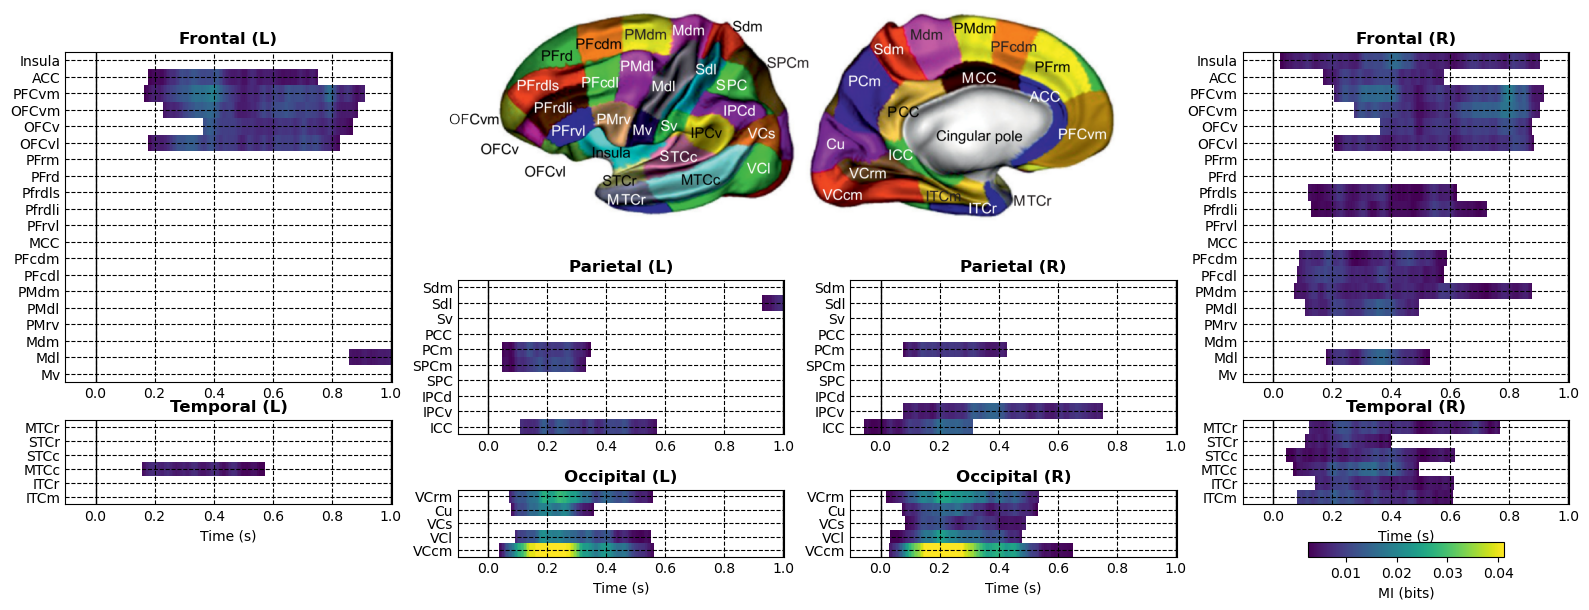

In [6]:
# Plot cluster-based gcmi on MarsAtlas
title = ''
vlines = {0.: dict(color='k', linewidth=1, linestyle='-'), 1.: dict(color='k', linewidth=1, linestyle='-')}
f = plot_marsatlas(gcmi, pvalues=pvalues, threshold=threshold, time=(-0.1, 1.),
               subcortical=False, contrast=1, cmap='viridis', title=title,
               cblabel='MI (bits)', vlines=vlines, grid=True)
# Add MarsAtlas
fname = Results_Dir + 'marsatlas.png'
marsatlas = plt.imread(fname)
newax = f.add_axes([0.29, 0.54, 0.45, 0.45])
# chage size of f to 16 x 8
f.set_size_inches(16, 6)
newax.imshow(marsatlas)
newax.axis('off')

# Adjust layout
plt.tight_layout()

plt.show()

In [19]:
# f.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_2.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_7851/4228138855.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_2.png', dpi=300, bbox_inches='tight')


## Suppl Figure 1. Correlations between Information Gain and RPE, Uncertainties


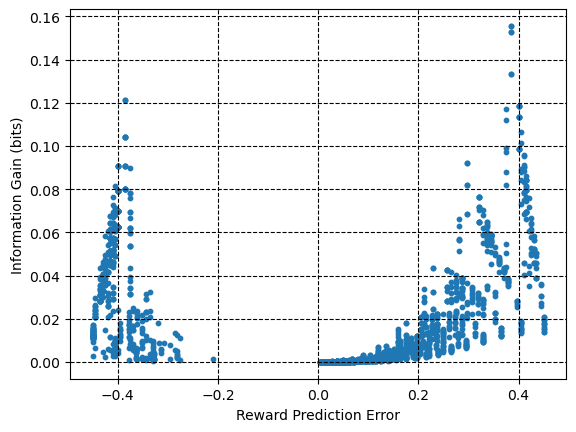

In [7]:
# Load regressors data
Results_Dir = '/home/INT/brovelli.a/code/hosi_infogain/data/'
fname = Results_Dir + 'regs_all.xlsx'
# Load xls file
regs = pd.read_excel(fname, sheet_name="Sheet1")

# Plot the relation between info gain and rpe
plt.figure()
plt.scatter(regs['rpe'], regs['infogain'], s=10)
plt.ylabel('Information Gain (bits)')
plt.xlabel('Reward Prediction Error')
plt.grid()
plt.show()

## Suppl Figure 2. Heat map of Information gain activations


In [50]:
tmin=-0.7
tmax=1.
mi = data['mi'].copy()
pv = data['pv'] < 0.05

# roi selection
# crop times
mi = mi.sel(times=slice(tmin, tmax))
pv = pv.sel(times=slice(tmin, tmax))
is_roi = pv.any('times').values
assert np.any(is_roi)
mi = mi.sel(roi=is_roi)
pv = pv.sel(roi=is_roi)
mi_s = mi.copy()
mi_s.data[~pv.data] = np.nan
mi_parc = mi_s.mean('times')    



In [57]:
regions = [
    "ACC_internal_left", "ACC_internal_right", "Cu_external_left", "Cu_external_right", "Cu_internal_left", "Cu_internal_right",
    "ICC_internal_left", "ICC_internal_right", "Insula_external_left", "Insula_external_right", "IPCd_external_left",
    "IPCd_external_right", "IPCv_external_left", "IPCv_external_right", "ITCm_internal_left", "ITCm_internal_right",
    "ITCr_external_left", "ITCr_external_right", "ITCr_internal_left", "ITCr_internal_right", "MCC_internal_left",
    "MCC_internal_right", "Mdl_external_left", "Mdl_external_right", "Mdm_external_left", "Mdm_external_right",
    "Mdm_internal_left", "Mdm_internal_right", "MTCc_external_left", "MTCc_external_right", "MTCr_external_left",
    "MTCr_external_right", "MTCr_internal_left", "MTCr_internal_right", "Mv_external_left", "Mv_external_right",
    "OFCvl_external_left", "OFCvl_external_right", "OFCvm_external_left", "OFCvm_external_right", "OFCv_external_left",
    "OFCv_external_right", "PCC_internal_left", "PCC_internal_right", "PCm_internal_left", "PCm_internal_right",
    "PFcdl_external_left", "PFcdl_external_right", "PFcdm_external_left", "PFcdm_external_right", "PFcdm_internal_left",
    "PFcdm_internal_right", "PFCvm_internal_left", "PFCvm_internal_right", "PFrdli_external_left", "PFrdli_external_right",
    "PFrdls_external_left", "PFrdls_external_right", "PFrd_external_left", "PFrd_external_right", "PFrd_internal_left",
    "PFrd_internal_right", "PFrm_internal_left", "PFrm_internal_right", "PFrvl_external_left", "PFrvl_external_right",
    "PMdl_external_left", "PMdl_external_right", "PMdm_external_left", "PMdm_external_right", "PMdm_internal_left",
    "PMdm_internal_right", "PMrv_external_left", "PMrv_external_right", "Sdl_external_left", "Sdl_external_right",
    "Sdm_external_left", "Sdm_external_right", "Sdm_internal_left", "Sdm_internal_right", "SPCm_external_left",
    "SPCm_external_right", "SPCm_internal_left", "SPCm_internal_right", "SPC_external_left", "SPC_external_right",
    "STCc_external_left", "STCc_external_right", "STCr_external_left", "STCr_external_right", "Sv_external_left",
    "Sv_external_right", "VCcm_external_left", "VCcm_external_right", "VCcm_internal_left", "VCcm_internal_right",
    "VCl_external_left", "VCl_external_right", "VCl_internal_left", "VCl_internal_right", "VCrm_internal_left",
    "VCrm_internal_right", "VCs_external_left", "VCs_external_right"
]

unique_regions = set()
modified_regions = []
for region in regions:
    base_region = region.split("_")[0] + "_" + region.split("_")[2]
    if base_region not in unique_regions:
        unique_regions.add(base_region)
        if "left" in region:
            modified_regions.append("L_" + base_region.split("_")[0])
        elif "right" in region:
            modified_regions.append("R_" + base_region.split("_")[0])


labels = modified_regions
dic_label = {label: np.random.rand() for label in labels}



In [54]:
def create_data_ggplot(dt, tmin=-0.7, tmax=1.):

    # data selection
    mi = dt['mi'].copy()
    pv = dt['pv'] < 0.05

    # roi selection
    # crop times
    mi = mi.sel(times=slice(tmin, tmax))
    pv = pv.sel(times=slice(tmin, tmax))
    is_roi = pv.any('times').values
    assert np.any(is_roi)
    mi = mi.sel(roi=is_roi)
    pv = pv.sel(roi=is_roi)
    mi_s = mi.copy()
    mi_s.data[~pv.data] = np.nan
    mi_parc = mi_s.mean('times')       

    indices = np.where(pv.any('times').values)[0]

    data = {k: v for k, v in zip(indices, mi_parc.data)}     

    return data


TypeError: argument of type 'numpy.int64' is not iterable

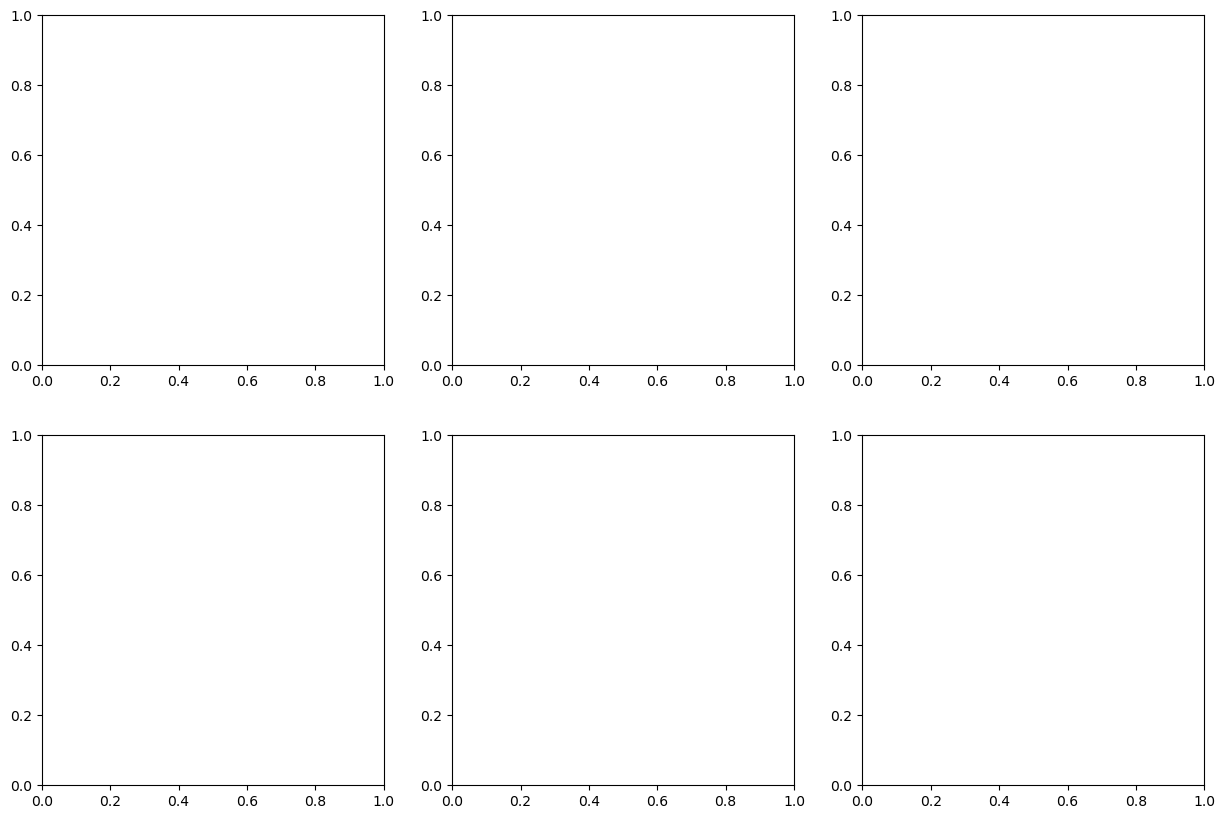

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define start and end times
start_time = -0.2
end_time = 1.0

# Define step
step = 0.2

# Generate time intervals
time_intervals = [(start, start + step) for start in np.arange(start_time, end_time, step)]

# Calculate number of rows and columns for subplots
n = len(time_intervals)
rows = 2
cols = int(np.ceil(n / rows))

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5))

# Flatten axs for easy iteration
axs = axs.flatten()

for i, (tmin, tmax) in enumerate(time_intervals):
    data_slice = create_data_ggplot(data, tmin=tmin, tmax=tmax)
    # Check whether data  is not empty otherwise skip
    if not data_slice:
        continue
    # Round tmin and tmax to 2 decimal places
    tmin = round(tmin, 2)
    tmax = round(tmax, 2)
    title = f"dt = [{tmin}, {tmax}]"
    # select the correct subplot
    plt.subplot(rows, cols, i+1)
    ggplot_marsatlas(
        data_slice, ylabel="MI (bits)", fontsize=4, cmap='viridis',
        title=title, cbar_loc='right', ax=plt.gca())

plt.tight_layout()
plt.show()

## Figure 3. Local spatio-temporal correlates of information gain in anatomical clusters

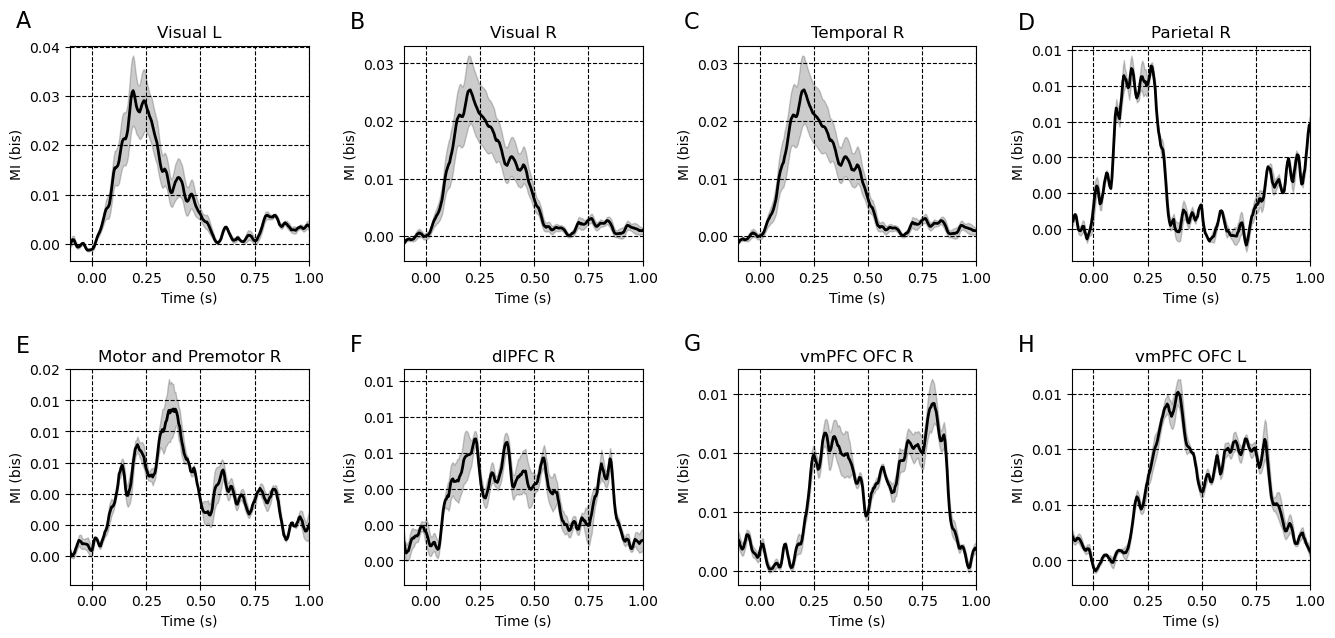

In [8]:
# Significant region of interests ROIs
visual_1 = {'vis_l': ['L_VCcm', 'L_VCl', 'L_Cu', 'L_VCrm']}
visual_2 = {'vis_r': ['R_VCcm', 'R_VCl', 'R_Cu', 'R_VCrm', 'R_VCs'] }
temporal = {'temp_r':  ['R_ITCm', 'R_ITCr', 'R_MTCc', 'R_STCc', 'R_MTCr']}
parietal = {'par_r': ['L_PCm', 'L_SPCm']}
pfc_1    = {'mot_pm_r': ['R_Mdl', 'R_PMdl', 'R_PMdm']}
pfc_2    = {'dlpfc_r': ['R_Pfrdli', 'R_Pfrdls', 'R_PFcdm', 'R_PFcdl']}
ofc_1    = {'vmpfc_ofc_r': ['R_OFCvl', 'R_OFCv', 'R_OFCvm', 'R_PFCvm']}
ofc_2    = {'vmpfc_ofc_l': ['L_OFCvl', 'L_OFCv', 'L_OFCvm', 'L_PFCvm']}

# Subplot for 2 x 4 panels
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 7))

# Adjust the spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5) 

# Create a function for plotting
def plot_cluster_timecourse(gcmi, roi_dict, title, panel, ax):
    # Extract ROI names from dictionary
    roi_key = list(roi_dict.keys())[0]
    roi_list = roi_dict[roi_key]
    
    # Select data for these ROIs
    Y = gcmi.sel(roi=roi_list)
    
    # Compute mean and standard error
    M = Y.mean(dim='roi')
    sem = Y.std(dim='roi') / np.sqrt(len(roi_list))
    
    # Plot the mean line
    M.plot.line(ax=ax, color='k', linewidth=2)
    
    # Plot the filled area for SEM
    ax.fill_between(gcmi.times, M - sem, M + sem, color='k', alpha=0.2)
    
    # Limit ylabel to 2 decimals
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    # Set title, labels, and grid
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('MI (bis)')
    # y lim for all plots
    ax.set_xlim([-0.1, 1.])
    ax.grid(visible=True)
    
    # Add panel text 10% on top of the maximum value
    yval = np.max(M + sem) + 0.15*np.max(M + sem)
    ax.text(-0.35, yval, panel, fontsize=16)
    
# Occipital areas (L)
plot_cluster_timecourse(gcmi, visual_1, 'Visual L', 'A', ax1)

# Occipital areas (R)
plot_cluster_timecourse(gcmi, visual_2, 'Visual R', 'B', ax2)

# Temporal areas
plot_cluster_timecourse(gcmi, visual_2, 'Temporal R', 'C', ax3)

# Parietal areas
plot_cluster_timecourse(gcmi, parietal, 'Parietal R', 'D', ax4)

# Lateral PM areas
plot_cluster_timecourse(gcmi, pfc_1, 'Motor and Premotor R', 'E', ax5)

# DLPFC areas
plot_cluster_timecourse(gcmi, pfc_2, 'dlPFC R', 'F', ax6)

# VMPFC/OFC areas (R)
plot_cluster_timecourse(gcmi, ofc_1, 'vmPFC OFC R', 'G', ax7)

# VMPFC/OFC areas (L)
plot_cluster_timecourse(gcmi, ofc_2, 'vmPFC OFC L', 'H', ax8)


## Figure 5. Redundancy and Synergy links encoding Information Gain

In [3]:
# Load data
fname = Results_Dir + 'outcome_infogain_pairwise_redundancy.nc'
ds = xr.load_dataset(fname)
# Thresholded data
da = ds.fredc * (ds.pv <= 0.05)
# Rename dim links
da = da.rename({'links': 'roi'})
# Select time interval
da = da.sel(times=slice(-0.1, 1.))
# Red 
red = da
# Load data
fname = Results_Dir + 'outcome_infogain_pairwise_synergy.nc'
ds = xr.load_dataset(fname)
# Thresholded data
da = ds.fsync * (ds.pv <= 0.05)
# Rename dim links
da = da.rename({'links': 'roi'})
# Select time interval
da = da.sel(times=slice(-0.1, 1.))
# Syn 
syn = da
# Take abs to remove potential -ve values due to bias correction
red = np.abs(red)
syn = np.abs(syn)

/home/INT/brovelli.a/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/INT/brovelli.a/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/INT/brovelli.a/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/INT/brovelli.a/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:527: Futur

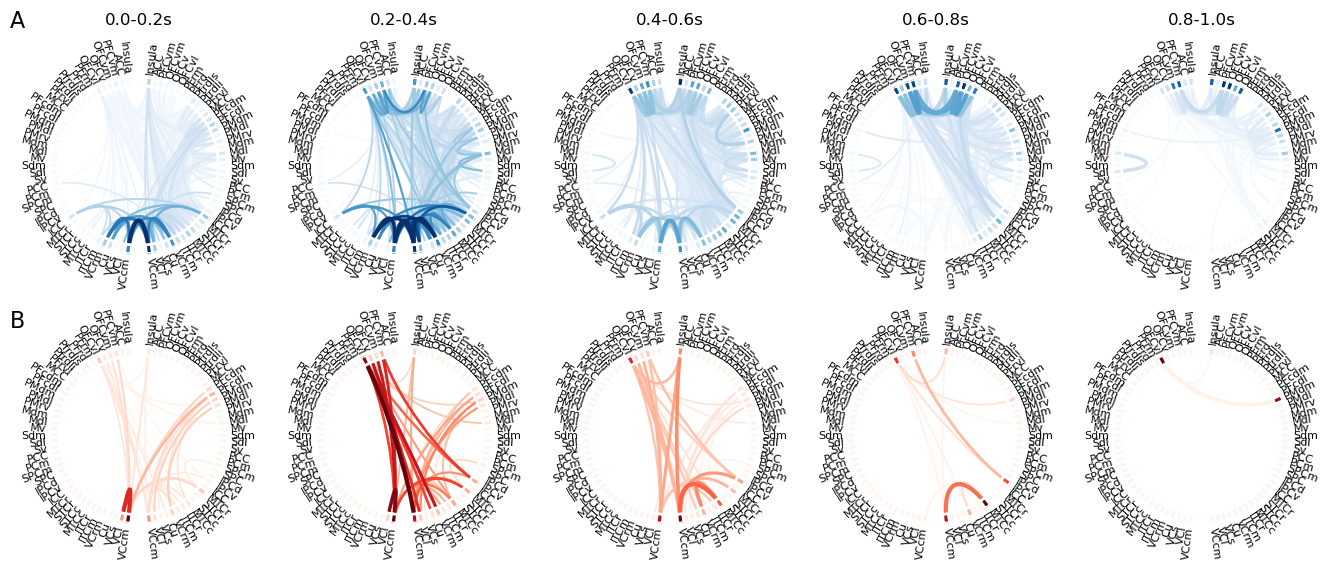

In [4]:
# Subplot per area
f, axs = plt.subplots(2, 5, figsize=(16, 6))
axs = np.ravel(axs)
# Add space horizontally between subplots
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.4)

# Time intervals
dt = 0.2
tc = np.arange(0.1, 0.95, 0.2)

i = 0
for t in tc:
    # Select time interval
    da = red.sel(times=slice(t-dt/2, t+dt/2))
    # Avergage over time
    da = da.mean(dim='times')
    # Create adj conn matrix
    da = conn_reshape_undirected(da, sep='-', order=None, rm_missing=False,
                                 fill_value=np.nan, to_dataframe=False,
                                 inplace=False, verbose=None)
    # Squeeze time axis
    da = da.squeeze()

    # Plot circular
    # plt.sca(axs[i])
    subplot_title = str(np.round((t-dt/2)*100)/100) + '-' + str(np.round((t+dt/2)*100)/100) + 's'

    plot_fcd_circular_xr(da.where(da > 0.), node_color='weight', colorbar=False, vmax=0.015, cmap='Blues',
                         cmap_node='Blues', lobes=['Frontal', 'Parietal', 'Occipital', 'Temporal'],
                         fig=f, subplot=(2,5,i+1), title=subplot_title)
   
    # Reduce the font of the title
    plt.title(subplot_title, fontsize=12, fontweight='bold')
    # move the title up a bit
    plt.title(subplot_title, y=1.25)
    
    i += 1

for t in tc:

    # Select time interval
    # da = red.sel(times=slice(start, start + dt))
    da = syn.sel(times=slice(t-dt/2, t+dt/2))

    # Avergage over time
    da = da.mean(dim='times')

    # Create adj conn matrix
    da = conn_reshape_undirected(da, sep='-', order=None, rm_missing=False,
                                 fill_value=np.nan, to_dataframe=False,
                                 inplace=False, verbose=None)
                             
    # Squeeze time axis
    da = da.squeeze()

    # Plot abs values
    da = np.abs(da)
    
    plot_fcd_circular_xr(da.where(da > 0.), node_color='weight', vmax=0.006, colorbar=False, cmap='Reds',
                        cmap_node='Reds', lobes=['Frontal', 'Parietal', 'Occipital', 'Temporal'],
                        fig=f, subplot=(2,5,i+1))

    
    i += 1

# Add text to the top row of subplots
plt.text(0.1, 0.95, 'A', fontsize=16, transform=plt.gcf().transFigure)
plt.text(0.1, 0.45, 'B', fontsize=16, transform=plt.gcf().transFigure)

plt.show()


In [7]:
# f.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_5.png', dpi=300, bbox_inches='tight')

## Figure 7. Higher-order synergy with Bayesian surprise

In [8]:
# Load data
fname = Results_Dir + 'outcome_infogain_cluster_hoi_synergy.nc'
ds = xr.load_dataset(fname)

# Thresholded data
# data_mi = ds.hoi  * (ds.pv <= 0.05)
data = ds.tv * (ds.pv <= 0.05)
data_sign = ds.tv  * (ds.pv <= 0.05)

# Select time interval
data = data.sel(times=slice(-0.1, 1.))

# Select link with non zero entries in the matrix
data = data.sel(links=data_sign.links[data_sign.sum('times') != 0])

# Calculate the order of each link (multiplet)
# (i.e. the number of '-' in the label of the two nodes of the link)
labels = data['links']
order = [len([c for c in s if c == '-']) for s in labels.values]
# adde 1 to the order to avoid 0
order = np.array(order) + 1
order = np.array(order)
# add dimension with the valuers of order to the dataframe
data['order'] = ('links', order)

# Tranform to dataframe
data = data.T
df = data.to_pandas()

/tmp/ipykernel_70999/809961212.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='normal', fontsize=10)
/tmp/ipykernel_70999/809961212.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i.replace('_', ' ') for i in df.index])


Text(1.025, -4.0, 'Synergistic weight')

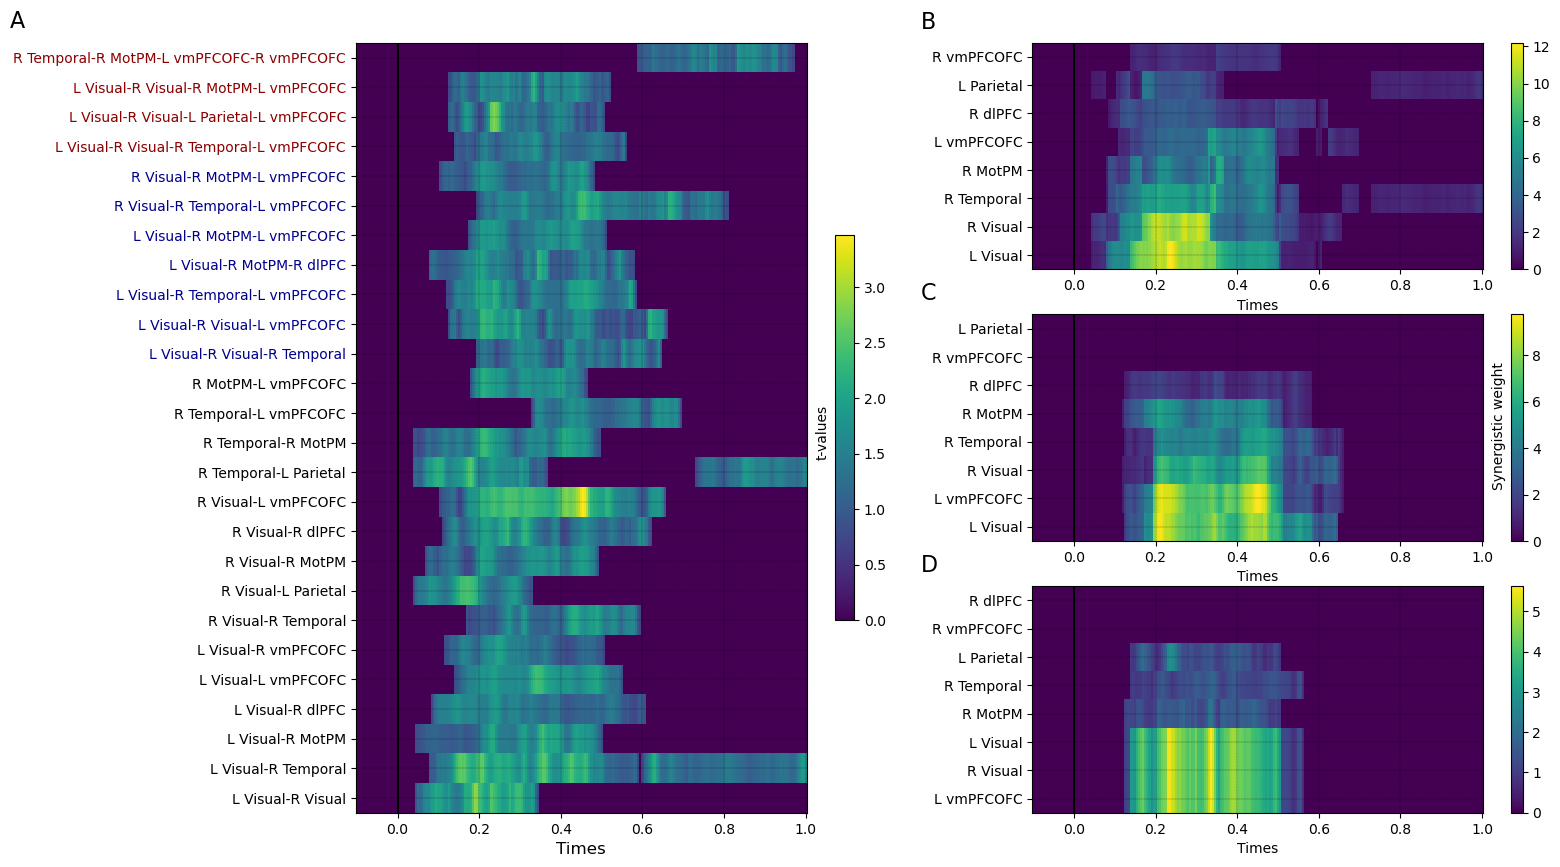

In [409]:
# Plot figure with subplots of different sizes
fig = plt.figure(1, figsize=(16, 10))
# Use gridspec to partition the figure into subplots
gridspec.GridSpec(3,2)
# Get axes object
ax = plt.subplot2grid((3,2), (0,0), rowspan=3, colspan=1)
# Plot heatmap
plt.pcolormesh(
    df.columns, df.index, df.values, cmap='viridis', shading='auto',
)
plt.xlabel('Times', fontsize=12)
# set xtick label fontsize to 8
plt.xticks(fontsize=10)
plt.axvline(0., color='k')

# Set the color of the ylabel to red for the first 10 labels
for i, t in enumerate(ax.get_yticklabels()):
    if order[i] == 2:
        t.set_color('k')
    elif order[i] == 3:
        t.set_color('darkblue')
    else :
        t.set_color('darkred')


# Set the ylabels font to bold 
ax.set_yticklabels(ax.get_yticklabels(), fontweight='normal', fontsize=10)
# legend
plt.colorbar(shrink=0.5)
# Reduce the width of the colorbar
# Add the legend of the colorbar
plt.text(1.025, 11.5, 't-values', fontsize=10, rotation=90)
# cbar.ax.set_position([-.2, -0.05, .01, .6])
# Set the label of the colorbar on top of the colorbar

# remove underscores from ylabels 
ax.set_yticklabels([i.replace('_', ' ') for i in df.index])
# add grid dotted
plt.grid(True, linestyle='--', linewidth=0.2)

# Add subplot label
ax.text(-0.95, 26, 'A', fontsize=16)

#-----------------------------------------------
# Analysis of temporal hypergraph representation
#-----------------------------------------------
# ROI labels
list_rois = ['L_Visual', 'R_Visual', 'L_Parietal', 'R_Temporal', 'R_MotPM', 'R_dlPFC' , 'L_vmPFCOFC','R_vmPFCOFC']
# Short ROIS labels
list_rois_short = ['L Vis', 'R Vis', 'L Par', 'R Temp', 'R MotPM', 'R dlPFC' , 'L vmOFC','R vmOFC']
# Titles
titles = ['Pairs', 'Triplets', 'Quadruplets']
subplot_label = ['B', 'C', 'D']
# Get only a specific order of the edges hypergraph
# Node weights as array of shape (n_orders, n_rois)
node_weights = np.zeros((3, len(list_rois)))
# Loop over orders
for k, o in enumerate(np.unique(order)):
    # Find the indices of the edges at a specific order
    ind_order = np.where(data.links.order == o)[0]
    # Select the data at a specific order
    data_order = data[ind_order]
    # Define roi weight vector for all time points
    weights = np.zeros((len(list_rois), data_order.shape[1]))
    # Loop over time points
    for t in range(data_order.shape[1]):
        # Get the indices of the edges that are active at time t
        ind = np.where(data_order.values[:, t] > 0)[0]
        # If there are no active edges, skip this time point
        if len(ind) == 0:
            continue
        # Get the labels of the active hyperedges
        labels = data_order.links[ind]
        for n, roi in enumerate(list_rois):
            # Find the indices of the edges that contain the ROI
            ind_edge = np.where([roi in j for j in labels.links.data])[0]
            # If the roi is not part of the edge, skip this roi
            if len(ind_edge) == 0:
                continue
            # Get the weights of the active hyperedges
            weights[n, t] = data_order.values[ind_edge, t].sum()
            # Get the labels of the active hyperedges


    # Store weights for each order for later plots
    node_weights[k] = weights.sum(axis=1)
    # Get axes object
    ax = plt.subplot2grid((3,2), (k, 1), rowspan=1, colspan=1)
    # Sort weights by values
    ind_sort = np.argsort(weights.sum(axis=1))
    weights = weights[ind_sort,:]
    # plot the weights with pcolormesh
    plt.pcolormesh(data_order.times, range(len(list_rois)), weights, shading='auto')
    # add xlabel only the last subplot
    plt.xlabel('Times', fontsize=10)
    # make colormap
    plt.set_cmap('viridis')
    # Fontsize of the colorbar
    plt.colorbar().ax.tick_params(labelsize=10)
    # set xtick label fontsize to 8
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # Add yticks only the first subplot
    # remove "_" from yticklabels
    list_rois_ = [i.replace('_', ' ') for i in list_rois]
    # Sort list_rois_ according to ind_sort
    list_rois_ = [list_rois_[i] for i in ind_sort]
    # Replace list_rois_ with list_rois_short
    # list_rois_ = list_rois_short
    plt.yticks(range(len(list_rois_)), list_rois_, fontsize=10)
    # invert order of yticklabels
    plt.gca().invert_yaxis()
    # add zero line
    plt.axvline(0., color='k')
    # Add text vertically to the left of the subplot
    # plt.ylabel(titles[k], fontsize=12, rotation=90, labelpad=8)
    # add dotted grid
    plt.grid(True, linestyle='--', linewidth=0.2)

    # Add subplot label that changes with the order
    ax.text(-0.375, -1, subplot_label[k], fontsize=16)

# Add the legend of the colorbar
plt.text(1.025, -4., 'Synergistic weight', fontsize=10, rotation=90)

In [410]:
node_weights

array([[744.85494286, 642.69855459, 218.16443589, 573.17595901,
        380.42807114, 265.28378677, 375.66913615, 121.97860958],
       [631.60092534, 460.54949711,   0.        , 369.35795486,
        335.5236034 , 127.57169918, 591.42330468,   0.        ],
       [317.7476121 , 317.7476121 , 100.31056376, 107.02176251,
        110.41528584,   0.        , 317.7476121 ,   0.        ]])

In [10]:
# Compute the number of significant links at order 2
order = data.links.order
order_2 = np.where(order == 2)[0]
order_3 = np.where(order == 3)[0]
order_4 = np.where(order == 4)[0]
order_5 = np.where(order == 5)[0]
# Number of links pairwise from 8 nodes
nlinks = math.comb(8, 2)
# Number of triplets from 8 nodes
ntriplets = math.comb(8, 3)
# Number of quadruplets from 8 nodes
nquadruplets = math.comb(8, 4)
# NUmber of quintuplets from 8 nodes
nquintuplets = math.comb(8, 5)

# print the percentage of significant links at all orders
print('Percentage of significant links at order 2: {0:.2f}%'.format(100 * len(order_2) / nlinks))
print('Percentage of significant links at order 3: {0:.2f}%'.format(100 * len(order_3) / ntriplets))
print('Percentage of significant links at order 4: {0:.2f}%'.format(100 * len(order_4) / nquadruplets))
print('Percentage of significant links at order 5: {0:.2f}%'.format(100 * len(order_5) / nquintuplets))
# print the numer of significant links at all orders
print('Number of significant links at order 2: {0}'.format(len(order_2)))
print('Number of significant links at order 3: {0}'.format(len(order_3)))
print('Number of significant links at order 4: {0}'.format(len(order_4)))   
print('Number of significant links at order 5: {0}'.format(len(order_5)))

Percentage of significant links at order 2: 53.57%
Percentage of significant links at order 3: 12.50%
Percentage of significant links at order 4: 5.71%
Percentage of significant links at order 5: 0.00%
Number of significant links at order 2: 15
Number of significant links at order 3: 7
Number of significant links at order 4: 4
Number of significant links at order 5: 0


In [10]:
fig.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_6.png', dpi=300, bbox_inches='tight')

## Suppl Figure 3. Higher-order synergistic interactions with multiple plots

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import xarray as xr
from sklearn.decomposition import NMF
import xarray as xr
import matplotlib.cm as cm
import operator
import networkx as nx
#import saving as sv
#import clusim_copy.clustering
#import clusim_copy.sim
import xgi

In [200]:
# Synergistic HOI data
syn_matrix = df.values

# ROI labels
list_rois = ['L_Visual', 'R_Visual', 'L_Parietal', 'R_Temporal', 'R_MotPM', 'R_dlPFC' , 'L_vmPFCOFC','R_vmPFCOFC']
# Short ROIS labels
list_rois_short = ['L Vis', 'R Vis', 'L Par', 'R Temp', 'R MotPM', 'R dlPFC' , 'L vmOFC','R vmOFC']

# Create list of links 
multiplets = list(df.index)
multiplets_splitted = [l.split('-') for l in multiplets]

# Create list of nodes within multiplets
for i, l in enumerate(multiplets_splitted):
    multiplets_splitted[i] = [list_rois.index(node) for node in l]
    

In [276]:
# 2D positions of clusters
delta_ang = (np.pi - 0.8)/5
aa = np.pi/2-0.4
# Coordinates 
R_dlPFC_y = np.sin((aa-delta_ang*1.25))
R_dlPFC_x = np.cos((aa-delta_ang*1.25))
R_MotPM_y = np.sin((aa-delta_ang*2.5))
R_MotPM_x = np.cos((aa-delta_ang*2.5))
R_Temporal_y = np.sin((aa-delta_ang*3.75))
R_Temporal_x = np.cos((aa-delta_ang*3.75))
R_vmPFCOFC_y = np.sin((aa))
R_vmPFCOFC_x = np.cos((aa))
L_vmPFCOFC_y = np.sin((aa+0.8))
L_vmPFCOFC_x = np.cos((aa+0.8))
L_Visual_y = np.sin((-aa-0.8))
L_Visual_x = np.cos((-aa-0.8))
R_Visual_y = np.sin((-aa))
R_Visual_x = np.cos((-aa))
# Transform to dictionary
renorm = 1.
coord = {'L_Visual': (L_Visual_x/renorm, L_Visual_y/renorm),
         'R_Visual': (R_Visual_x/renorm, R_Visual_y/renorm),
         'L_Parietal': (-1/renorm, 0.),
         'R_Temporal': (R_Temporal_x/renorm, R_Temporal_y/renorm),
         'R_MotPM': (R_MotPM_x/renorm,R_MotPM_y/renorm),
         'R_dlPFC': (R_dlPFC_x/renorm, R_dlPFC_y/renorm),
         'L_vmPFCOFC': (L_vmPFCOFC_x/renorm,L_vmPFCOFC_y/renorm),
         'R_vmPFCOFC': (R_vmPFCOFC_x/renorm, R_vmPFCOFC_y/renorm)}         
# Crete pos for xgi
pos = np.array(list(coord.values()))

In [430]:
sublets

[[0, 1, 117.12398157202975],
 [0, 3, 293.67111748716957],
 [0, 4, 135.3700159149957],
 [0, 5, 139.03470907357917],
 [0, 6, 141.198065905265],
 [0, 7, 101.33313802569302],
 [1, 3, 120.05761855605806],
 [1, 2, 96.43522809217194],
 [1, 4, 122.46631725814231],
 [1, 5, 149.6998165794066],
 [1, 6, 220.27025916747334],
 [3, 2, 185.30331037912225],
 [3, 4, 140.2883703719617],
 [3, 6, 103.71474562126845],
 [4, 6, 96.74535977977646]]

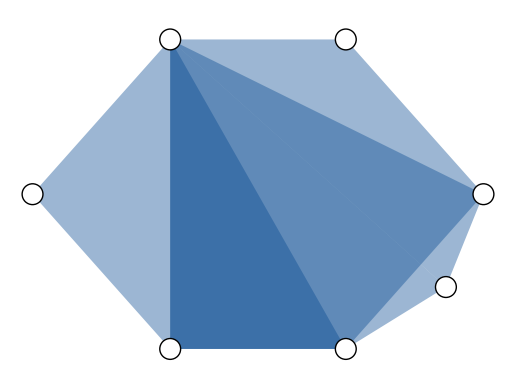

In [435]:
H_k = xgi.Hypergraph()
H_k.add_weighted_edges_from(sublets)

xgi.draw(H_k, pos=pos)


In [438]:
sublets

[[0, 1, 0.10489345292744945],
 [0, 3, 1.0],
 [0, 4, 0.1974021459393243],
 [0, 5, 0.21598240113438325],
 [0, 6, 0.22695077427540603],
 [0, 7, 0.02483275203384613],
 [1, 3, 0.11976720127531333],
 [1, 2, 0.0],
 [1, 4, 0.13197947516457714],
 [1, 5, 0.27005525541329584],
 [1, 6, 0.6278524230815883],
 [3, 2, 0.45056750350833574],
 [3, 4, 0.2223385531624346],
 [3, 6, 0.03690767208455691],
 [4, 6, 0.0015723897337133932]]

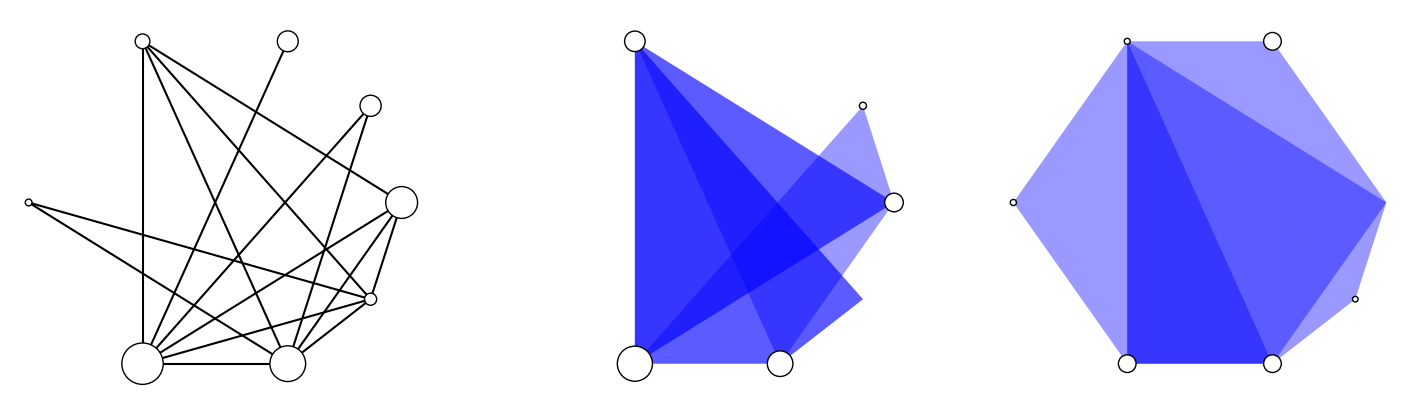

In [443]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Compute total node weight for later plot
multiplet_weight = data.values.sum(axis=1)
# Loop over oders
for i, k in enumerate(range(2,5)):
    # Find the indices of the edges at a specific order
    ind_order = np.where(data.links.order == k)[0]
    # Multiple weights at order k
    weights = (multiplet_weight[ind_order] - multiplet_weight[ind_order].min()) / (multiplet_weight[ind_order].max() - multiplet_weight[ind_order].min())
    # Take the rows indicated by ind_order of multiplets_splitted
    sublets = [multiplets_splitted[i] for i in ind_order]
    # Append the weights to the sublets
    sublets = [sublets[i] + [weights[i]] for i in range(len(sublets))]
    # Create order-specific hypergraph
    H_k = xgi.Hypergraph()
    # H_k.add_nodes_from(list_rois)
    H_k.add_weighted_edges_from(sublets)
    
        
    cmap=cm.Blues
    # Plot the hypergraph at each order
    xgi.draw(H_k, pos=pos, ax=axs[i], dyad_color='black', dyad_lw=1.5, edge_fc='b', node_fc='white', \
             node_ec='black', node_lw=1, node_size=node_weights[i]/25, node_labels=False, hyperedge_labels=False)
    

    
    
 

291.93863143194346 96.43522809217197


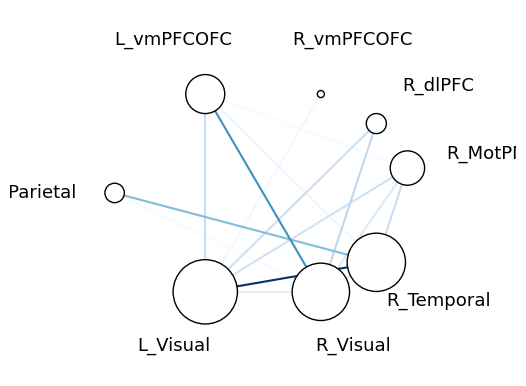

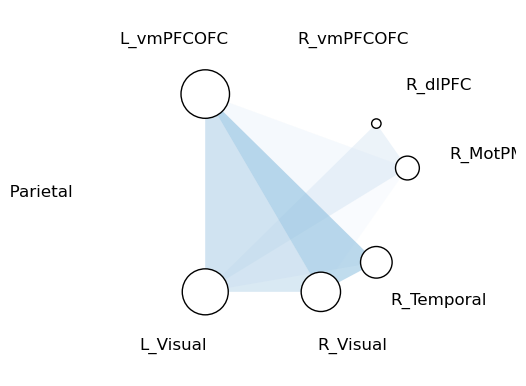

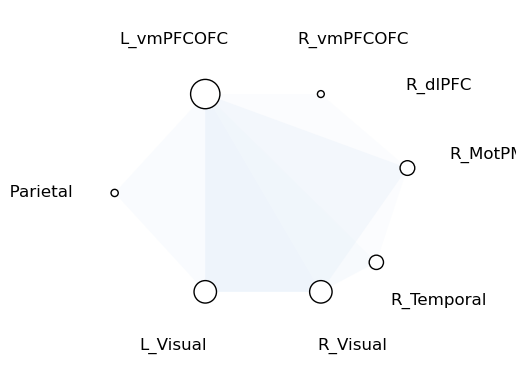

In [211]:
aaaa=np.arange(0,220) #one can chose aaaa, bbbb, cccc differently to plot hypergraph for different time intervals. Here we want to see the aggregated hypergraph for all the time steps (from 0 to 401)
#bbbb=np.arange(100,200)
#cccc=np.arange(200,401)
max_order = 5
for indices in [aaaa]:    
    
    pesi={}
    ama=0
    ami=1000

    for k in range(max_order-2):
        k=k+2

        #ind=np.where(total_syn[k]>0)[0]
        pesi[k]=np.sum(syn_dict[k][:,indices], axis=1)

        amaa=max(pesi[k])
        ama=max(ama, amaa)

        amii=min(pesi[k])
        ami=min(ami, amii)


    node_siz={}
    print(ama,ami) 
    for i in [2,3,4]:

        weights=[]

        zipped=zip(link_dict[i], pesi[i])
        zipped_ord=sorted(zipped, key = operator.itemgetter(1))
        
        for link, weig in zipped_ord:
            if weig != 0.:
                tupl=()
                for l in link:

                    tupl += (l,)
                tupl += (str(weig),)
                weights.append(tupl)

        H_hypergraph=xgi.Hypergraph()
        H_hypergraph_empty=xgi.Hypergraph()
        H_hypergraph.add_nodes_from(list_rois)
        H_hypergraph_empty.add_nodes_from(list_rois)
        H_hypergraph.add_weighted_edges_from(weights)

        node_siz[i]={}
        for r in list_rois:
            aa=0
            for l, link in enumerate(link_dict[i]):
                if r in link:
                    aa+=pesi[i][l]

            node_siz[i][r]=aa/20 

        h1=[]
        for _, h in zipped_ord:
            if h !=0.:
                h1.append(h)

        

        #print(max((h1-ami)/(ama-ami)))
        plt.figure(figsize=(5.2,3.8))
        cmap=cm.Blues((h1-ami)/(ama-ami))
        if i==2:
            xgi.draw(H_hypergraph, pos=coord, ax=None, dyad_color=cmap, dyad_lw=1.5, edge_fc='r', node_fc='white', node_ec='black', node_lw=1, node_size=node_siz[i], max_order=2, node_labels=False, hyperedge_labels=False)
            xgi.draw(H_hypergraph_empty, pos=coord_double, ax=None, dyad_color='white', dyad_lw=1.5, edge_fc='white', node_fc='white', node_ec='blue', node_lw=1, node_size=0, max_order=2, node_labels=True, hyperedge_labels=False, font_size_nodes=13)

        else:
            xgi.draw(H_hypergraph, pos=coord, ax=None, dyad_color='black', dyad_lw=1.5, edge_fc=cmap, node_fc='white', \
                node_ec='black', node_lw=1, node_size=node_siz[i], max_order=i, node_labels=False, hyperedge_labels=False, hull=True)
            #xgi.draw_node_labels(H_hypergraph, pos=coord, node_labels=False, font_size_nodes=10, font_color_nodes='black', font_family_nodes='sans-serif', font_weight_nodes='normal', alpha_nodes=0.5, bbox_nodes=None, horizontalalignment_nodes='left', verticalalignment_nodes='bottom', ax_nodes=None, clip_on_nodes=True)
            xgi.draw(H_hypergraph_empty, pos=coord_double, ax=None, dyad_color='white', dyad_lw=1.5, edge_fc='white', \
                node_fc='white', node_ec='blue', node_lw=1, node_size=0, max_order=2, node_labels=True, hyperedge_labels=False, \
                     font_size_nodes=12)

        plt.tight_layout(pad=0.5)
        # plt.savefig('figure/aggregated_graph_synergy_order_'+ str(i), dpi=600)
        plt.show()
        plt.close()
    



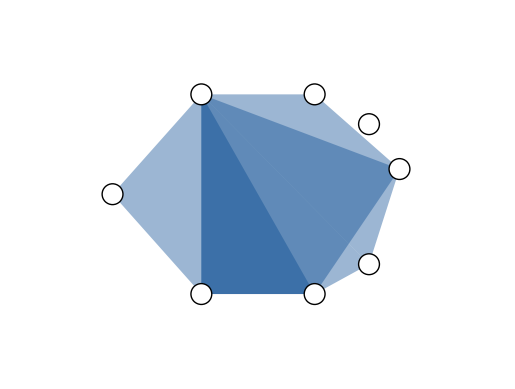

In [212]:
xgi.draw(H_hypergraph, pos=coord)

## Figure 7. Feature-specfic Information Transfer encoding Bayesian surprise


Text(1.015, 1, 'FIT (bits)')

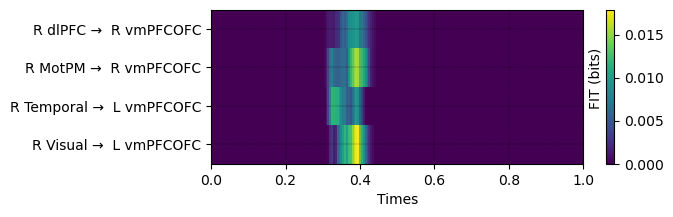

In [213]:
fname = Results_Dir + 'outcome_infogain_cluster_FIT.nc'
ds = xr.load_dataset(fname)

# Create thresholded FC matrix
da = ds.fit * (ds.pv <= 0.05)

# Rename dim links
# da = da.rename({'links': 'roi'})

# Select time interval
da = da.sel(times=slice(-0.1, 1.))

# Plot heatmap of the pairs of brain regions showing significant values different from 0
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
# Select the links with non zero values
da = da.sel(links=da.links[da.sum('times') != 0])
plt.pcolormesh(
    da.times, da.links, da.T, cmap='viridis', shading='auto',
)
# Add colorbar
plt.colorbar()
# Set xlim to -0.1 to 1.0   
plt.xlim(0., 1.0)

# add zero line
plt.axvline(0., color='k')
# Add text vertically to the left of the subplot
# plt.ylabel(titles[k], fontsize=12, rotation=90, labelpad=8)
# add dotted grid
plt.grid(True, linestyle='--', linewidth=0.2)


# Replace "->" with an arrow symbol
labels = da.links.values
labels = [i.replace('->', ' →  ') for i in labels]
# remove "_" from yticklabels
labels = [i.replace('_', ' ') for i in labels]
# Set the yticklabels
plt.yticks(range(len(labels)), labels, fontsize=10)
# Set the xticklabels
plt.xticks(fontsize=10)
# Add xlabel
plt.xlabel('Times', fontsize=10)
# Add the legend of the colorbar

# Add the legend of the colorbar
plt.text(1.015, 1, 'FIT (bits)', fontsize=10, rotation=90)

# # Set colorscale from 0 to 1.5
# plt.clim(0, 1.2)


In [214]:
fig.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_8.png', dpi=300, bbox_inches='tight')

### Local versus global synergy encoding of Bayesian surprise


NameError: name 'data_mi' is not defined

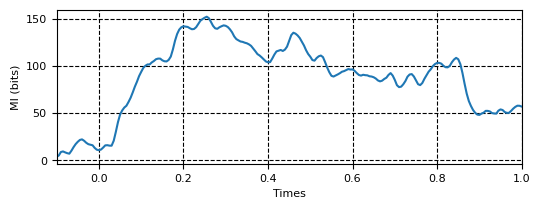

In [215]:
# Plot the sum of gcmi across all ROIs over time
local_encoding = gcmi_tval.sum('roi')
local_encoding = local_encoding.sel(times=slice(-0.1, 1.))
# plot local_encoding
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
plt.plot(local_encoding.times, local_encoding.values)
plt.xlabel('Times', fontsize=8)
plt.ylabel('MI (bits)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
# xlim to -0.1 to 1.0
plt.xlim(-0.1, 1.0)

# Compute the sum of all synergistic encoding
synergistic_encoding = data_mi.sum('links')
synergistic_encoding = synergistic_encoding.sel(times=slice(-0.1, 1.))
# plot synergistic_encoding
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
plt.plot(synergistic_encoding.times, synergistic_encoding.values)
plt.xlabel('Times', fontsize=8)
plt.ylabel('MI (bits)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.xlim(-0.1, 1.0)

# 
# fig.savefig('/home/INT/brovelli.a/Desktop/fig_visuomotor_meg/Fig_9.png', dpi=300, bbox_inches='tight')


### Granger causality analyses across orders


In [ ]:
# Load data
fname = Results_Dir + '{0}_{1}_{2}_{3}_syn_minorder2.nc'.format(event, mi_reg, mi_type, mcp)
ds = xr.load_dataset(fname)

# Thresholded data
data = ds.hoi  * (ds.pv <= 0.05)
# data = ds.tv

# Select time interval
data = data.sel(times=slice(-0.1, 1.))

# Select link with non zero entries in the matrix
data = data.sel(links=data_sign.links[data_sign.sum('times') != 0])

# Calculate the order of each link (multiplet)
# (i.e. the number of '-' in the label of the two nodes of the link)
labels = data['links']
order = [len([c for c in s if c == '-']) for s in labels.values]
# adde 1 to the order to avoid 0
order = np.array(order) + 1
order = np.array(order)
# add dimension with the valuers of order to the dataframe
data['order'] = ('links', order)

# Tranform to dataframe
data = data.T
df = data.to_pandas()

In [ ]:
from frites.conn import (conn_covgc, conn_reshape_directed,
                         conn_reshape_undirected)
# Compute granger causality measures bewteen the time series using conn_covgc
t0 = 10
lag = 20
dt = 200
x = df.values
# add a first empty dimension
x = np.expand_dims(x, axis=0)
times = df.columns
links = df.index
# replace the '-' by '_' in the labels in the links variable
links = [i.replace('-', ',') for i in links]
# Compute the order of each link, which is the number of ',' in the label + 1
order = [len([c for c in s if c == ',']) for s in links]
order = np.array(order) + 1
# compute covGC
gc = conn_covgc(x, dt, lag, t0, times=times, roi=links)


Defining links (n_roi=33; directed=False; net=False, nb_min_links=None)
Compute the  covgc (method=gc, normalised=False, n_pairs=528; n_windows=1, lag=20, dt=200, step=1)


  0%|          |  : 0/528 [00:00<?,       ?it/s]

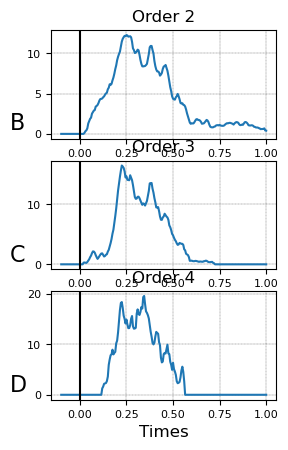

In [ ]:
# plot df data as time series and compute the average time course at each order
# Get the average time course at each order
# Loop over orders
for k, o in enumerate(np.unique(order)):
    # Find the indices of the edges at a specific order
    ind_order = np.where(order == o)[0]
    # Select the data at a specific order in x
    x_order = x[:, ind_order, :]
    # Compute the average time course
    x_order = x_order.mean(axis=1)
    # Get axes object
    ax = plt.subplot2grid((3,2), (k, 0), rowspan=1, colspan=1)
    # plot the average time course
    plt.plot(times, x_order.T)
    # add xlabel only the last subplot
    plt.xlabel('Times', fontsize=12)
    # add ylabel only the first subplot
    plt.ylabel('', fontsize=12)
    # add title
    plt.title('Order ' + str(o), fontsize=12)
    # add zero line
    plt.axvline(0., color='k')
    # add dotted grid
    plt.grid(True, linestyle='--', linewidth=0.2)
    # set xtick label fontsize to 8
    plt.xticks(fontsize=8)
    # set ytick label fontsize to 8
    plt.yticks(fontsize=8)
    # Add subplot label that changes with the order
    ax.text(-0.375, 0.5, subplot_label[k], fontsize=16)
    

In [ ]:
# calculate the mean of the gc for each pair of ROIs averaged according to the order
# Loop over orders
for k, o in enumerate(np.unique(order)):
    for j, oo in enumerate(np.unique(order)):
        # Compute the average of the data for each pair of order
        ind_k = np.where(order == o)[0]
        ind_j = np.where(order == oo)[0]
        # Select the data at a specific order
        data_order = gc.iloc[ind_k, ind_j]
        # Compute the average of the data at a specific order
        data_order = data_order.mean(axis=0)
        # store in a adjacency matrix
        if k == 0 and j == 0:
            gc_o = np.zeros((len(np.unique(order)), len(np.unique(order))))
        gc_o[k, j] = data_order.mean()

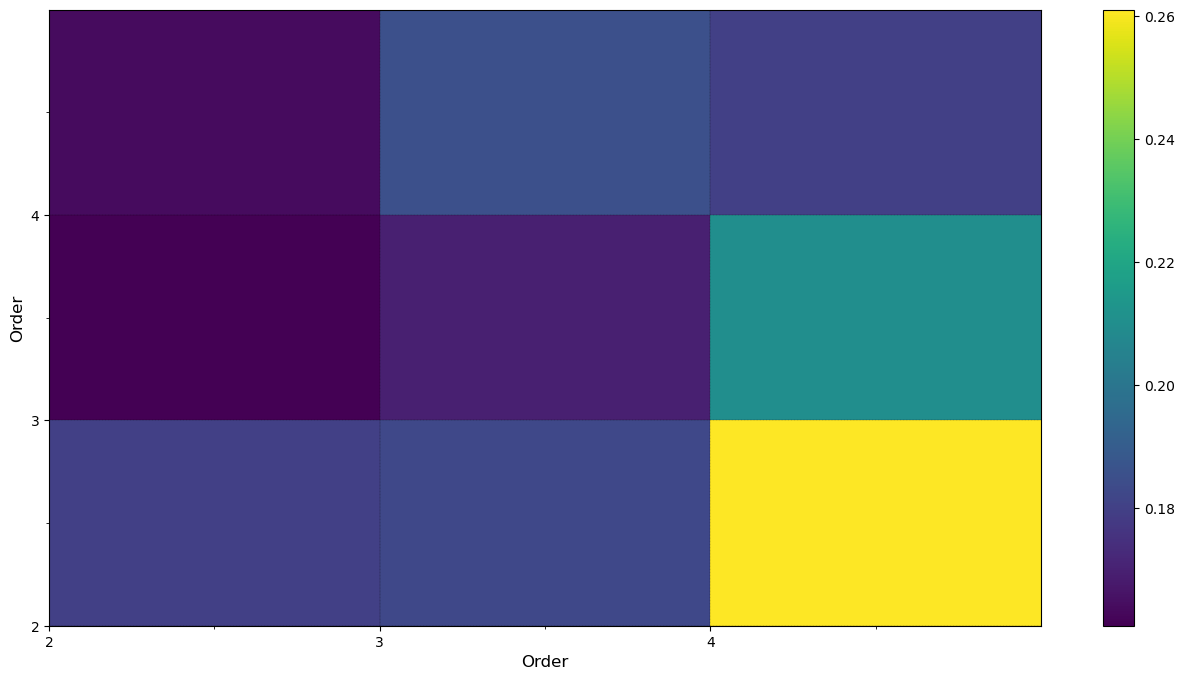

In [ ]:
# plot the gc_o as a adjacnecy mtraix with oder as labels
fig = plt.figure(1, figsize=(16, 8))
# plot data as a adjacency matrix
plt.pcolormesh(gc_o, cmap='viridis', shading='auto')
# add xlabel
plt.xlabel('Order', fontsize=12)
# add ylabel
plt.ylabel('Order', fontsize=12)
# add xticks as order values
plt.xticks(range(len(np.unique(order))), np.unique(order))  
# add yticks as order values
plt.yticks(range(len(np.unique(order))), np.unique(order))
# add tick and label in the middle of the cell
plt.gca().set_xticks(np.arange(len(np.unique(order))) + 0.5, minor=True)
plt.gca().set_yticks(np.arange(len(np.unique(order))) + 0.5, minor=True)
# add grid
plt.grid(True, linestyle='--', linewidth=0.2)
# add colorbar
plt.colorbar()
# add title





In [ ]:
# plot the time course of the data for each order
fig = plt.figure(1, figsize=(16, 8))
# loop over orders
for k, o in enumerate(np.unique(order)):
    # get the indices of the data at a specific order
    ind = np.where(order == o)[0]
    # Select the data at a specific order
    data_order = gc.iloc[ind, ind]
    # plot the data
    plt.plot(data_order.mean(axis=0), label=o)
